# A simple model of global cascades on random networks

#### Complex contagion
#### Binary Decisions with Externalities

## Libraries

In [2]:
library(igraph) # for graphs
library(ggplot2)  # for plots

## Parameters of the network

In [124]:
n <- 100 # number of nodes
z <- 3 #average degree
p <- z/n  #probability of connection between nodes in ERG ensemble
## definig the threshold for each state
phi <- 0.10 #threshold for changing state
nodes.threshold <- rep(phi, n)

## Sampling the network

In [125]:
g <- erdos.renyi.game(n = n,
                     p.or.m = p,  
                     type = "gnp",
                     directed = FALSE,
                     loops = FALSE)


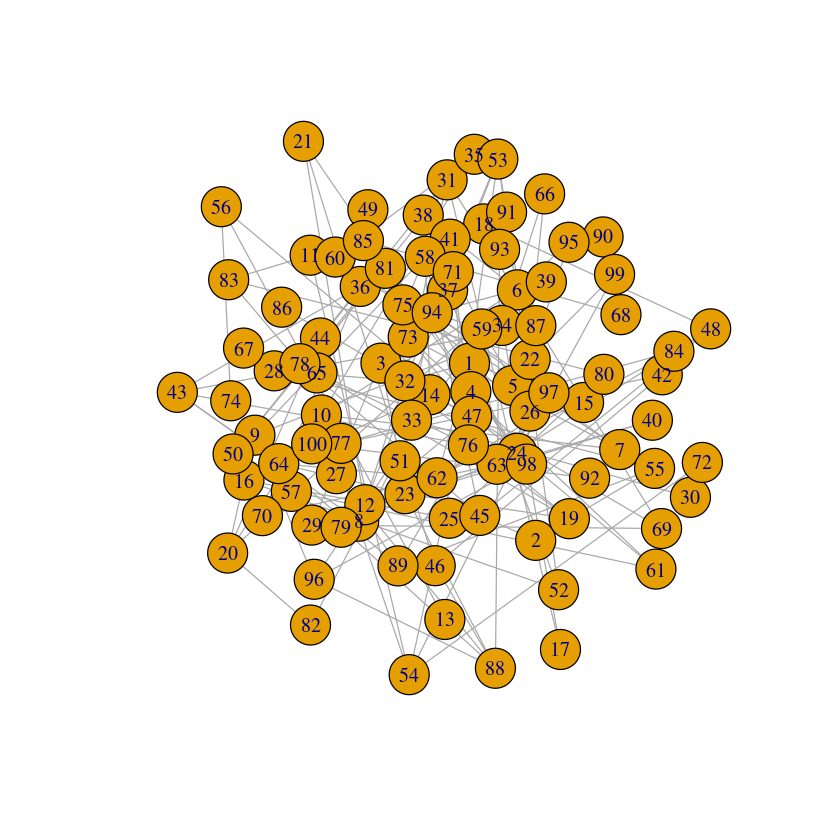

In [127]:
plot(g, layout=lay)

## Listing the neighbors of each node

In [128]:
nodes.neighbors <- list()
for (i in 1:n){
    nodes.neighbors[i] <- list(neighbors(g, i))
}

## Functions for the simulation

In [129]:
seed <- function(nodes.state, n.seeds = 1, method = 'random'){
    
    N <- length(nodes.state)
    
    if (method == 'random'){
        seeds.id <- sample.int(N, n.seeds)
    }
    
    nodes.state[seeds.id] <- 1
    
    return(nodes.state)
}

In [130]:
#this function is meanted for networks that do not change their structure during the evolution of the dynamics
update <- function(nodes.state, nodes.threshold, nodes.neighbors){
    
    N <- length(nodes.state)
    
    nodes.state.in <- nodes.state
    
    nodes.state.out <- nodes.state
    
    for (i in 1:N){
    
        if (nodes.state[i] != 1){
        
            if(sum(nodes.state.in[nodes.neighbors[[i]]])/length(nodes.neighbors[i]) >= nodes.threshold[i]){
                nodes.state.out[i] <- 1
            
            }          
        
        }
    
    }
    
    return(nodes.state.out)  
}

## Simulation

In [131]:
max.update <- 100   #maximum number of updates
t <- 0 #time steps

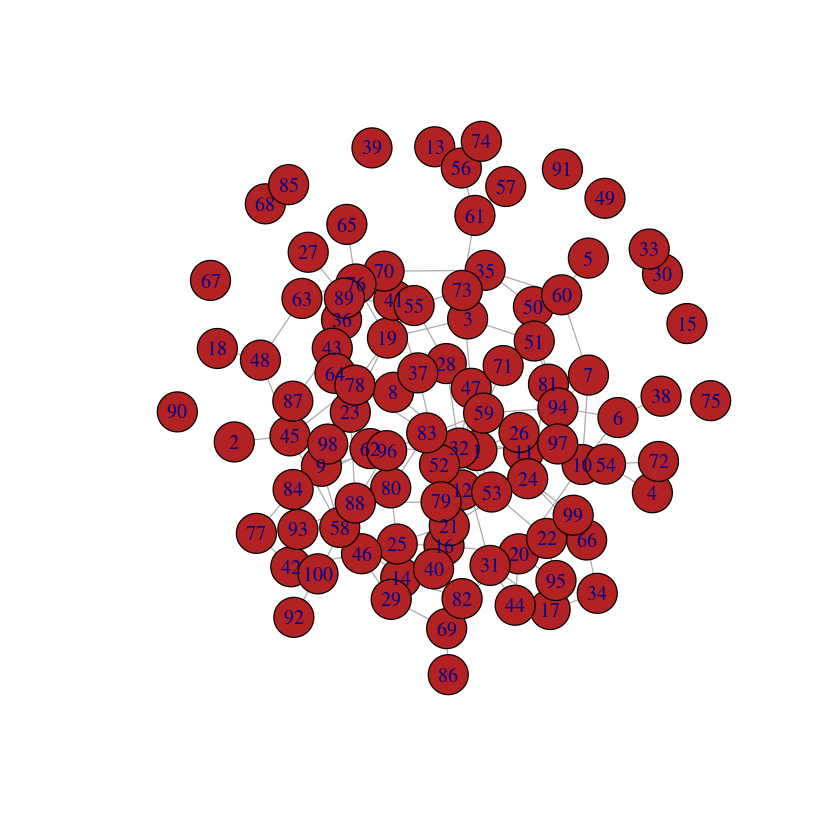

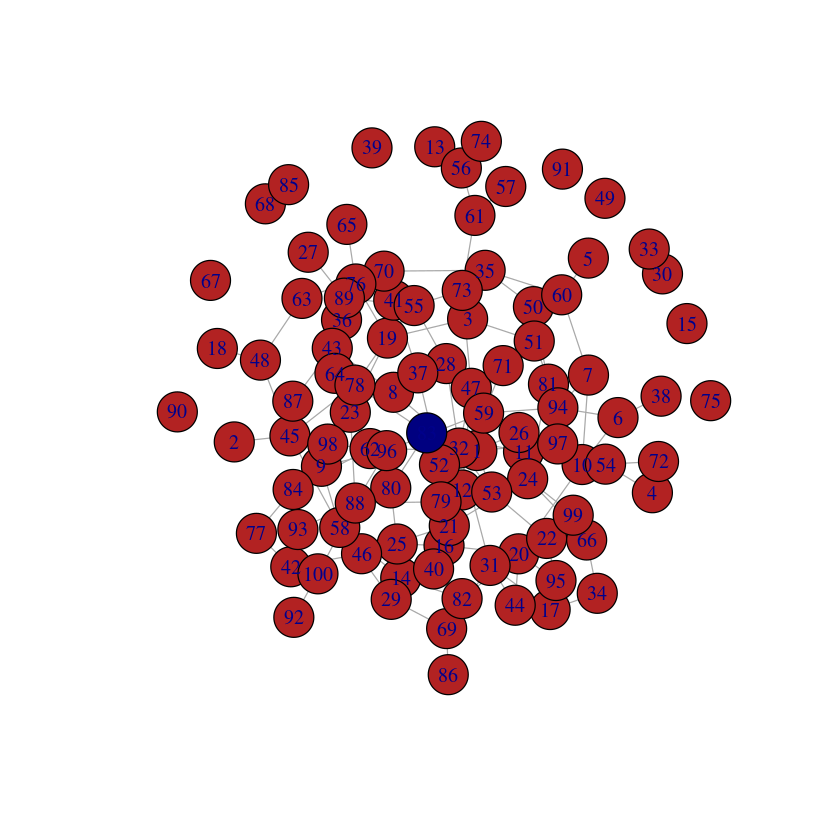

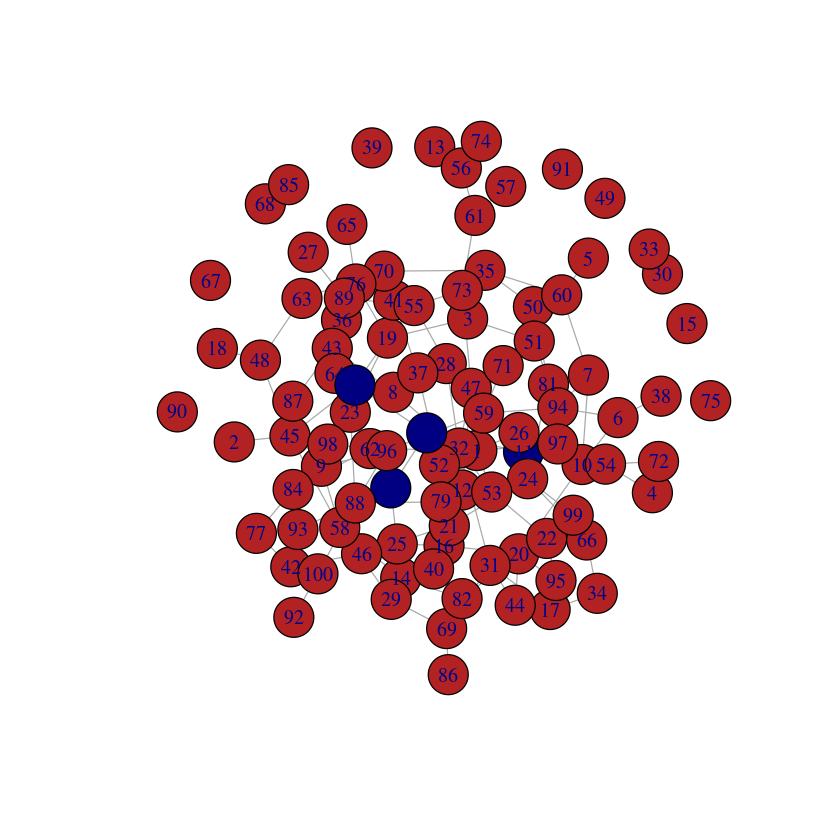

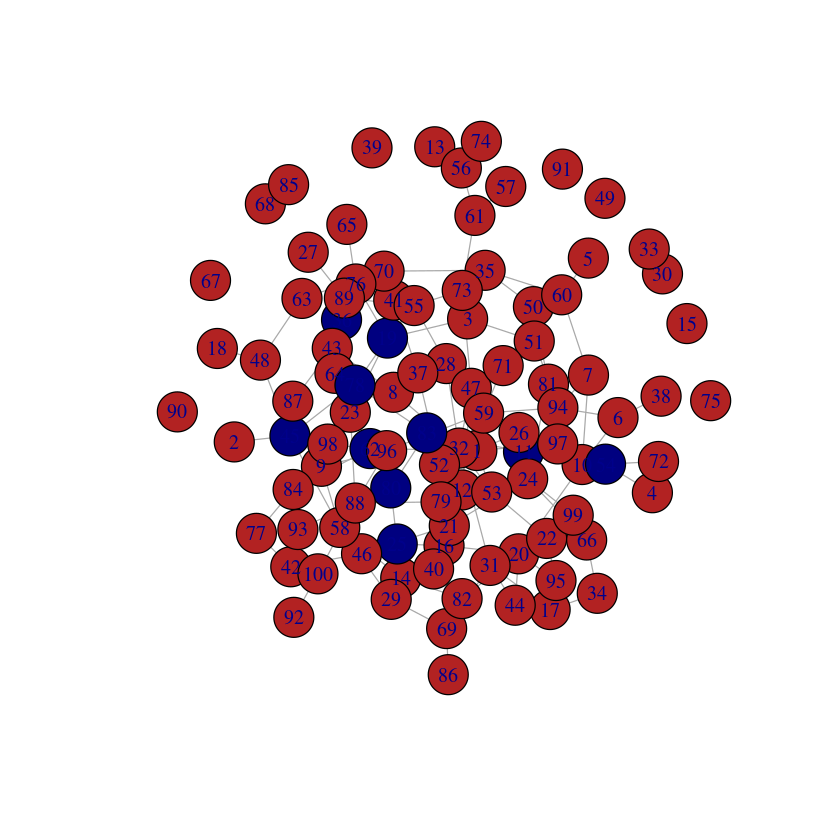

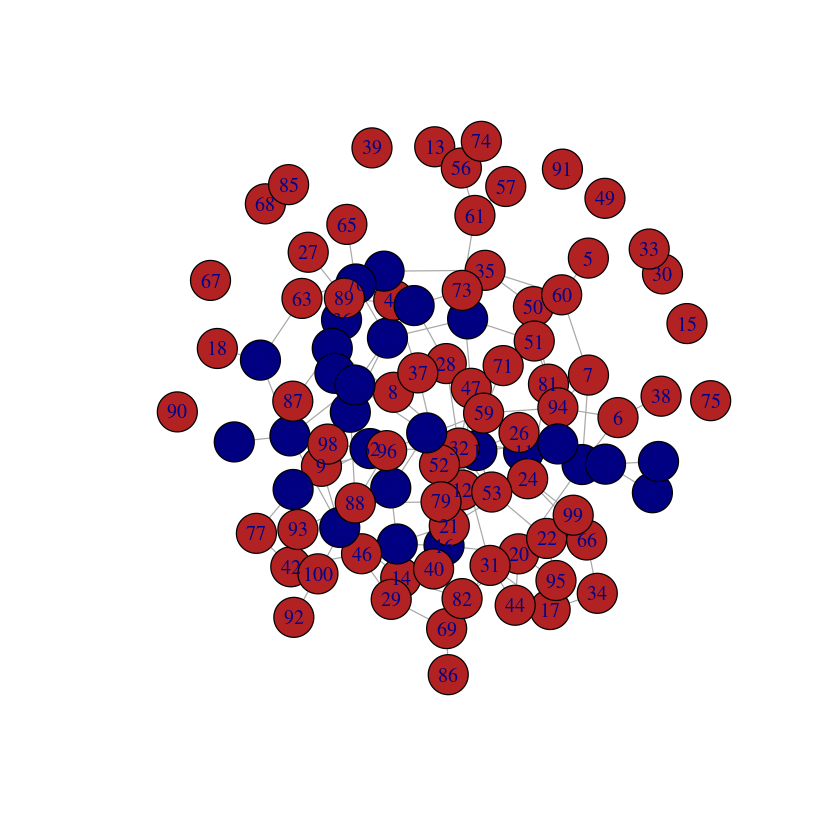

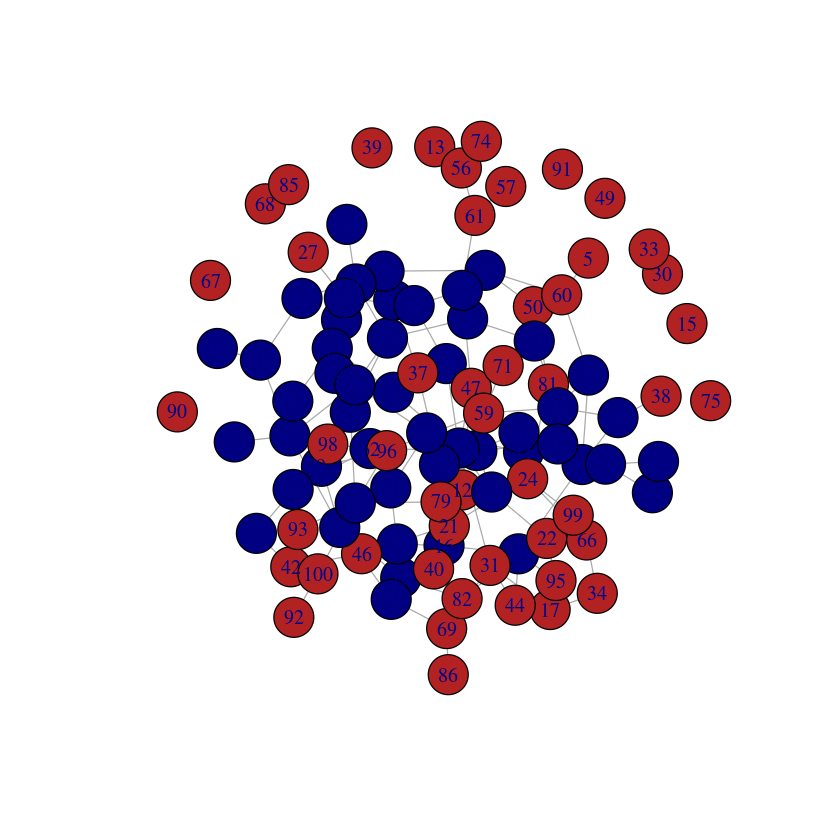

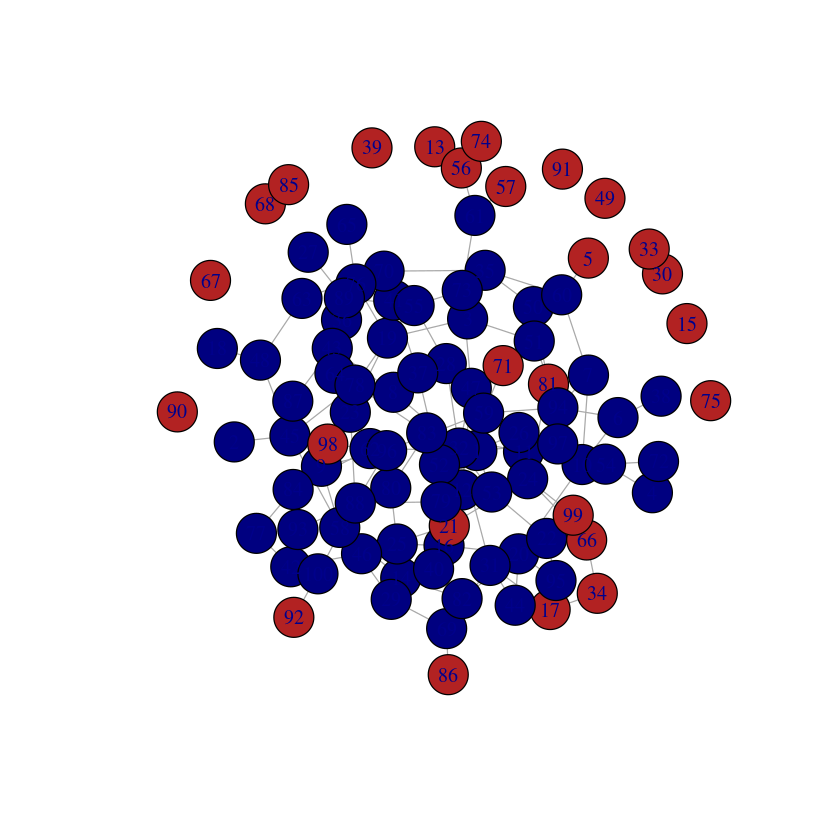

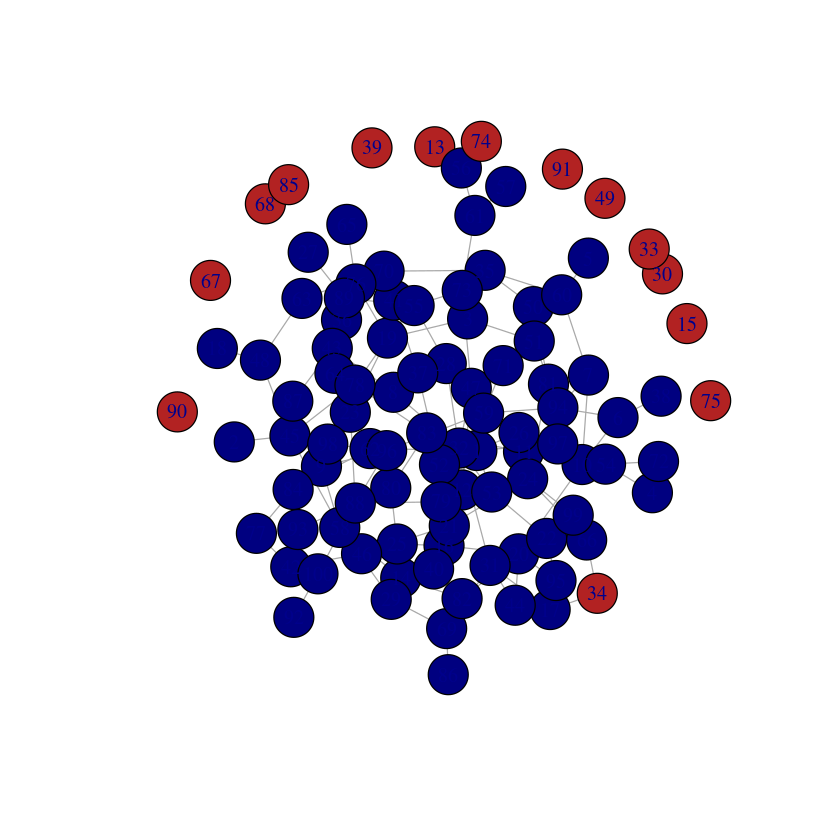

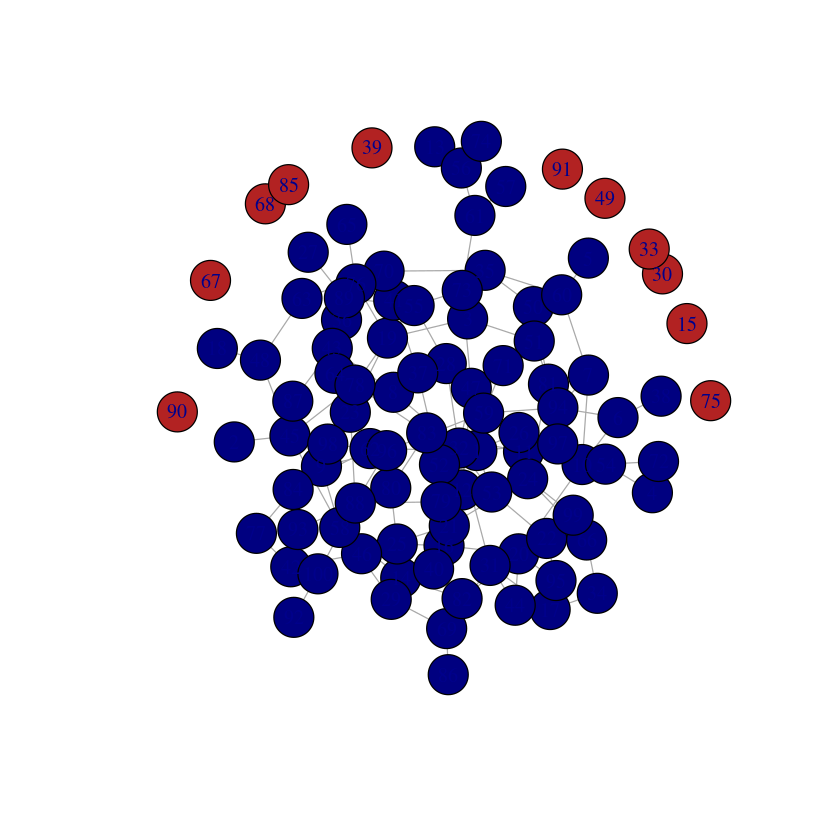

In [132]:
nodes.state <- numeric(n) #initializing to zero all nodes state
t <- 0   #initial time


lay <- layout_with_fr(g)
V(g)$color <- ifelse(nodes.state==1, 'navy', 'firebrick')
plot.igraph(g, layout = lay)

nodes.state <- seed(nodes.state, 1) #inserting some seeds
t <- 1   #time at which happen the seed

V(g)$color <- ifelse(nodes.state==1, 'navy', 'firebrick')
plot.igraph(g, layout = lay)

for (j in 1:max.update){
    
    nodes.state.previous <- nodes.state
    
    nodes.state <- update(nodes.state, nodes.threshold, nodes.neighbors)
    
    t <- t+1
   
    if(identical(nodes.state, nodes.state.previous)){
        break
    }
    
    V(g)$color <- ifelse(nodes.state==1, 'navy', 'firebrick')
    plot.igraph(g, layout = lay)

}
